In [201]:
import numpy as np
import pandas as pd

In [202]:
import pandas as pd

# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path ='/Users/banuprasadb/Downloads/sms_classifier/spam_191.csv' # Change this to the path of your CS file

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break # Stop the Loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue # Try the next encoding

# If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CsV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CsV file has been successfully loaded.


In [203]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1189,ham,In that case I guess I'll see you at campus lodge,NaN,NaN,NaN
518,ham,That way transport is less problematic than on...,NaN,NaN,NaN
766,ham,"I'm nt goin, got somethin on, unless they meet...",NaN,NaN,NaN
5107,ham,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...,NaN,NaN,NaN
5284,ham,Sent me ur email id soon,NaN,NaN,NaN


In [204]:
df.shape

(5572, 5)

In [205]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

Data cleaning

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [207]:
#drop 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [208]:
df.sample(5)

,v1,v2
2452,ham,Okay. I've seen it. So i should pick it on fri...
2549,ham,Yup but not studying surfing lor. I'm in e laz...
2128,ham,Well I'm going to be an aunty!
4651,ham,Where r e meeting tmr?
1055,ham,I'm at work. Please call


In [209]:
# renaming the cols
df.rename(columns={'v1' :'target', 'v2' :'text'}, inplace=True)
print(df.sample(5))

     target                                               text
4341    ham  Ha! I wouldn't say that I just didn't read any...
2026    ham  Nah man, my car is meant to be crammed full of...
2200    ham  Haha... can... But i'm having dinner with my c...
4666    ham                         I send the print  outs da.
4261    ham  You'll never believe this but i have actually ...


In [210]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [211]:
df[ 'target']= encoder.fit_transform(df['target' ])

In [212]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [213]:
# missing values
df.isnull().sum ()

target    0
text      0
dtype: int64

In [214]:
# check for duplicate values
df.duplicated() .sum()

403

In [215]:
# remove duplicates
df = df. drop_duplicates(keep='first')

In [216]:
df.duplicated().sum()

0

In [217]:
df. shape

(5169, 2)

EDA

In [218]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

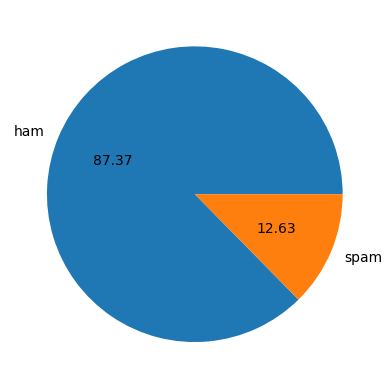

In [220]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=[ 'ham', 'spam'], autopct="%0.2f")
plt. show()

In [221]:
# Big Chunk of ham and very less spam so out data is not balanced

In [222]:
import nltk

In [223]:
!pip install nltk

In [224]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/banuprasadb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [225]:
df[ 'num_characters'] = df[ 'text'].apply(len) #number of char

In [226]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [227]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) #words count

In [228]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [229]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) #sentence

In [230]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [231]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [232]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [233]:
# targeting ham
df[df[ 'target'] == 0][[ 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [234]:
# targeting spam
df[df ['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [235]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

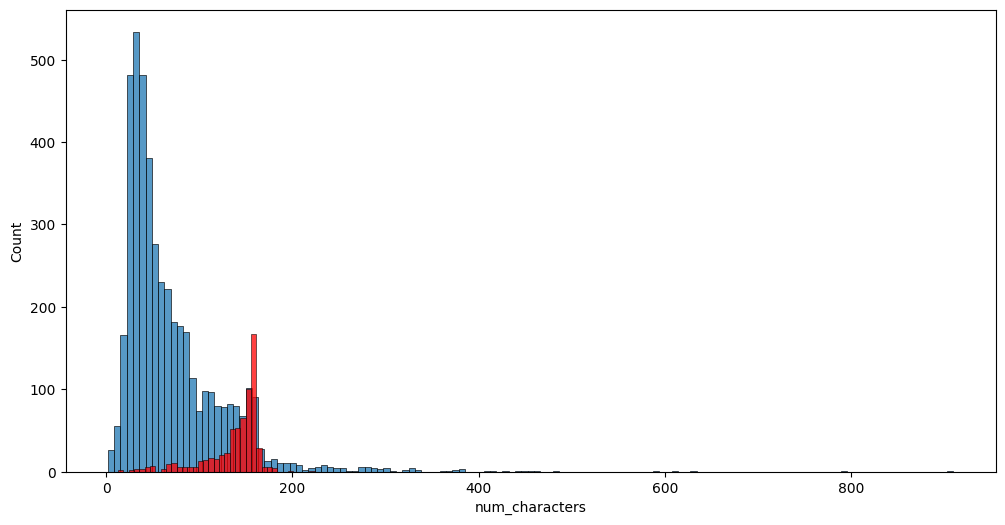

In [236]:
plt.figure(figsize=(12,6))
sns.histplot(df[df[ 'target'] == 0][ 'num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

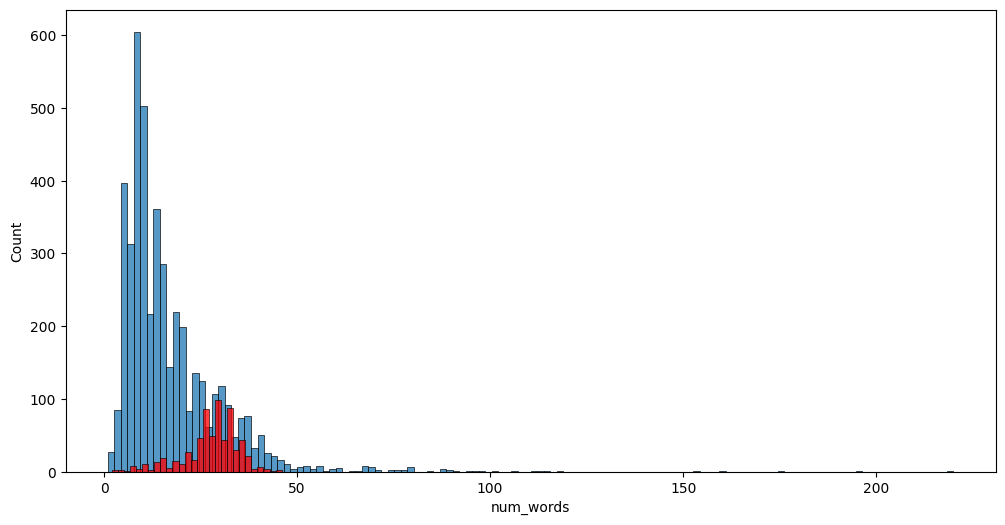

In [237]:
plt.figure(figsize=(12,6))
sns.histplot(df[df[ 'target'] == 0][ 'num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

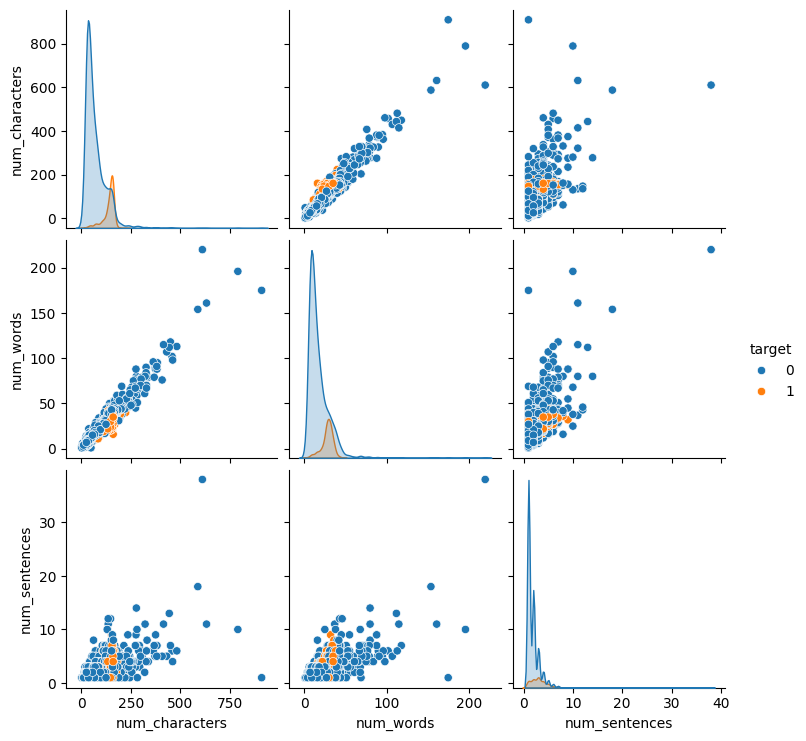

In [238]:
sns.pairplot(df, hue='target')

In [239]:
df_encoded = pd.get_dummies(df, columns=['text'])


#3 Text Preprocessing
    #Lower case
    #Tokenization
    #Removing special characters
    #Removing stop words and punctuation
    #Stemming

In [240]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
import string
nltk. download('stopwords') # You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i. isalnum():
            y. append (i)
    text = y[:]
    y. clear ()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string. punctuation:
            y. append (i)

    text = y[:]
    y. clear ()

    for i in text:
        y. append (ps. stem(i))

    return " ". join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/banuprasadb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [241]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [242]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [243]:
df['transformed_text'] = df['text'].apply(transform_text)

In [244]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [245]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10, background_color='white')

In [246]:
spam_wc = wc.generate(df[df[ 'target'] == 1][ 'transformed_text'].str.cat (sep=" "))

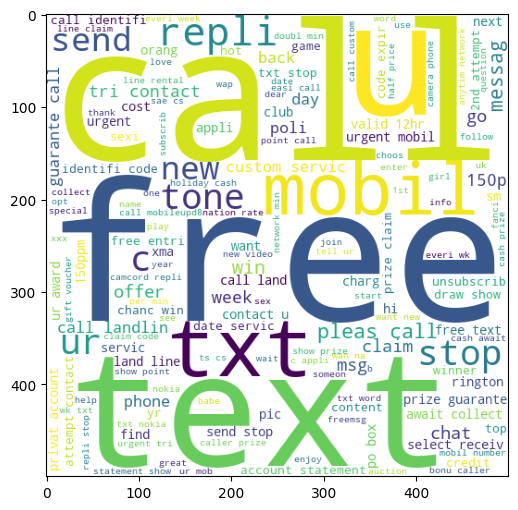

In [247]:
plt.figure(figsize=(15,6))
plt. imshow(spam_wc)

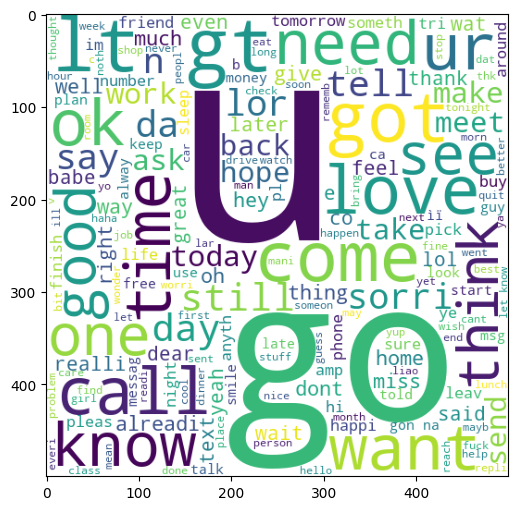

In [248]:
ham_wc = wc .generate(df[df['target'] == 0][ 'transformed_text'].str. cat (sep=" "))
plt. figure(figsize=(15,6))
plt. imshow(ham_wc)

In [249]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [250]:
spam_corpus = []
for msg in df[df ['target'] == 1]['transformed_text']. tolist():
    for word in msg. split():
        spam_corpus. append (word)

In [251]:
len(spam_corpus)

9939

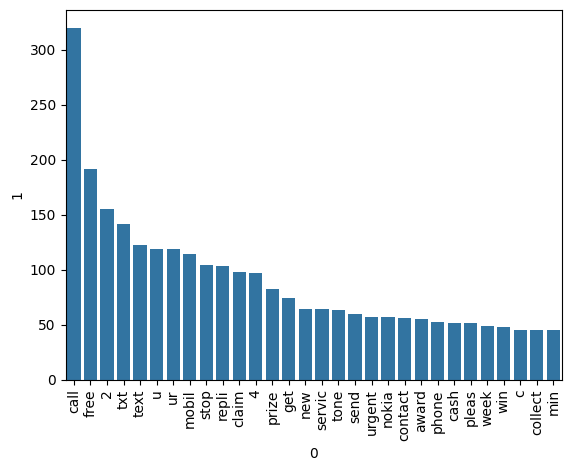

In [252]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()


In [253]:
ham_corpus = []
for msg in df[df[ 'target'] == 0]['transformed_text']. tolist():
    for word in msg.split():
        ham_corpus .append(word)

In [254]:
len(ham_corpus)

35404

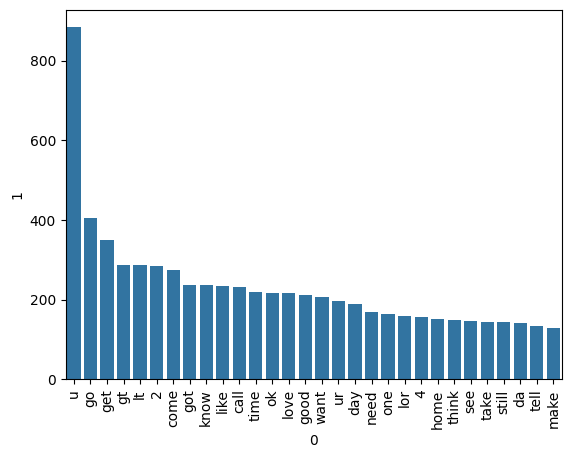

In [255]:
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()

In [256]:
# Text Vectorization
# using Bag of Words
df. head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


building a model

In [257]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [258]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [259]:
X.shape

(5169, 3000)

In [260]:
y = df['target'].values

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [263]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn. metrics import accuracy_score,confusion_matrix,precision_score

In [264]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [265]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print (accuracy_score(y_test, y_pred1)) 
print (confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [266]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print (confusion_matrix(y_test,y_pred2))
print(precision_score (y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [267]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [268]:
!pip install xgboost

In [269]:
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

In [270]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier (n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [271]:
clfs = {
'SVC' : svc,
'KN' : knc,
'NB' : mnb,
'DT' : dtc,
'LR' : lrc,
'RF' : rfc,
'AdaBoost': abc,
'BgC': bc,
'ETC' : etc,
'GBDT' : gbdt,
'xgb': xgb
}

In [272]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf. predict(X_test)
    accuracy = accuracy_score (y_test,y_pred)
    precision = precision_score (y_test,y_pred)

    return accuracy, precision

In [273]:
train_classifier (svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [274]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print ("For ", name)
    print ("Accuracy - ", current_accuracy)
    print( "Precision -", current_precision)
    accuracy_scores.append(current_accuracy) 
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision - 0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision - 1.0
For  NB
Accuracy -  0.9709864603481625
Precision - 1.0
For  DT
Accuracy -  0.9323017408123792
Precision - 0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision - 0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision - 0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision - 0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision - 0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision - 0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision - 0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision - 0.9262295081967213


In [275]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [276]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [277]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [278]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


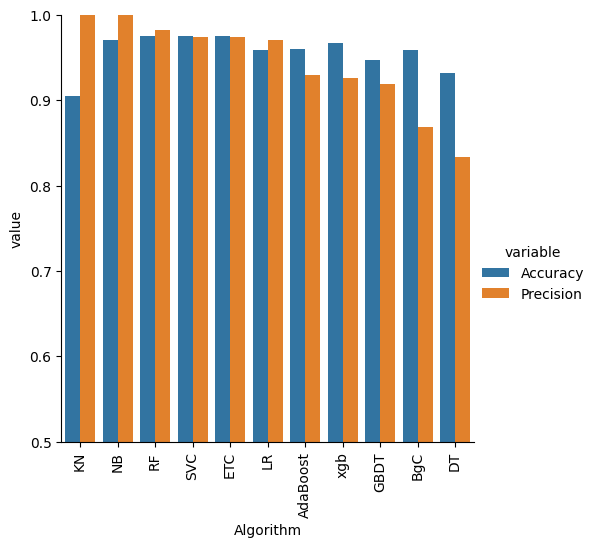

In [279]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt. ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt. show()

In [280]:
# improve model


In [284]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [286]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [287]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [288]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [289]:
# Voting Classifier

svc = SVC(kernel= 'sigmoid', gamma=1.0, probability=True)
mb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [290]:
voting = VotingClassifier(estimators=[('sm', svc), ('nb', mnb), ('et', etc)], voting= 'soft')

In [291]:
voting. fit(X_train,y_train)

VotingClassifier(estimators=[('sm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [292]:
y_pred = voting. predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [293]:
# Applying stacking
estimators=[ ('sym', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [294]:
# Applying stacking
estimators=[ ('sym', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [295]:
from sklearn.ensemble import StackingClassifier

In [296]:
clf = StackingClassifier (estimators=estimators, final_estimator=final_estimator)

In [297]:
clf. fit(X_train,y_train)
y_pred = clf. predict (X_test)
print("Accuracy", accuracy_score (y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [4]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [3]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
# Sample text data and corresponding Labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2","Sample text 3"]
y_train = [0, 1, 0] # Example Labels (0 for negative, 1 for positive)

# Create and tran the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open( 'model.pkl', 'wb') as model_file:
    pickle.dump (mnb, model_file)